# Data visualization

First let's import all the necessary packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Loading the cleaned data

In [2]:
df = pd.read_csv("../data/cleaned/CarPrice_cleaned.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,fuel injection,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,fuel injection,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,fuel injection,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,fuel injection,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,fuel injection,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Hypothesis

Based on your dataset, the columns most likely to have a strong correlation with car price are those that describe a car's size, performance, and features.

Here is a breakdown of the variables and their likely correlation with price, from strongest to weakest:

Strongest Correlation

These variables directly relate to the cost of a car's materials, engineering, and performance.

- horsepower: A car's power output is one of the most significant factors in its price. Higher horsepower generally means a more expensive car.
- enginesize: The physical size of the engine, which is a key determinant of power, is a strong indicator of price. Larger engines are typically more costly.
- curbweight: This is the car's weight without passengers or cargo. Heavier cars often require more materials and a larger engine, making them more expensive. This also correlates with the car's overall size.
- Dimensions (carlength, carwidth, carheight, wheelbase): Larger cars generally cost more to manufacture and are priced higher. The wheelbase, in particular, is a key indicator of a car's size and ride quality.
- drivewheel: The drivetrain type is a major design factor. A specialized system like 4wd (four-wheel drive) is typically more expensive than fwd (front-wheel drive) or rwd (rear-wheel drive).
- aspiration: A turbocharged (turbo) engine is a more complex and expensive component than a standard (std) naturally aspirated engine.
- brand: The manufacturer brand (e.g., Honda vs. Mercedes) is arguably the single most important determinant of price. You'd likely need to extract this from the CarName column.
- carbody: The body style has a significant impact. A luxury sedan or a convertible is typically more expensive than a standard hatchback.

Moderate Correlation

These variables are components of the engine that contribute to performance but are not as directly tied to price as the high-level metrics.

- cylindernumber: This is related to enginesize and horsepower. More cylinders generally mean a larger, more expensive engine.
- fuelsystem: The type of fuel injection system affects performance and cost. A modern multi-port fuel injection system (mpfi) is more advanced and often more expensive than an older carburetor-based system (1bbl, 2bbl).
- citympg and highwaympg: Fuel efficiency often has an inverse relationship with price. High-performance, expensive cars tend to have lower MPG, while more affordable economy cars have higher MPG.

Weak or No Correlation

These variables are unlikely to have a strong, consistent relationship with a car's price.

- car_ID: This is a unique identifier for each car and has no correlation with any of its properties, including price.
- doornumber: The number of doors has a weak relationship with price. While some two-door sports cars are expensive, so are four-door luxury sedans.
- symboling: This is an insurance risk rating and does not directly relate to the car's market price.
- stroke, boreratio, compressionratio, peakrpm: These are technical engineering details that contribute to performance, but their direct, standalone correlation with the final sale price is often weak. The effects of these are better captured by the more holistic measures of horsepower and enginesize.



## General price distribution

Let's first look at the histogram to show the general price distribution:

In [3]:
df['price'].describe().round(1)

count      205.0
mean     13276.7
std       7988.9
min       5118.0
25%       7788.0
50%      10295.0
75%      16503.0
max      45400.0
Name: price, dtype: float64

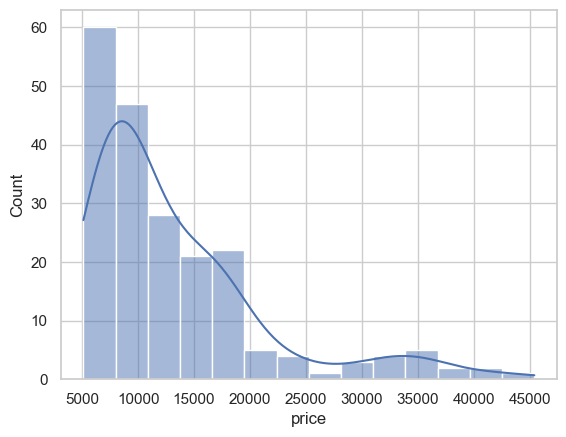

In [4]:
sns.set_theme(style='whitegrid')
sns.histplot(data=df, x='price', kde=True)
plt.show()

- From this we can see that the price essentially peaks at around 10,000 and then goes down, which is consistend tith the median price (10295). However there is a second smaller peak at around 35000.

## Categorical variables and price

#### Apriration system

Let's first take a look how many cars use each type of aspiration system

In [5]:
aspiration = df.groupby('aspiration').agg(count=('aspiration', 'size'), avg_price=('price', 'mean')).reset_index()
aspiration

,aspiration,count,avg_price
0,std,168,12611.270833
1,turbo,37,16298.166676


As you can clearly see from the table there are much more car models with the standard aspiration, than with turbo. The one with turbo also cost more on average:

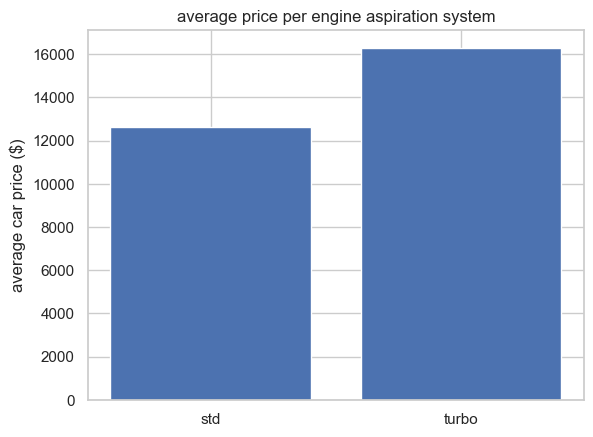

In [6]:
plt.bar(x=aspiration['aspiration'], height=aspiration['avg_price'])
plt.ylabel("average car price ($)")
plt.title("average price per engine aspiration system")
plt.grid(True, linestyle='-') 
plt.show()

In [7]:
drivewheel = df.groupby('drivewheel').agg(count=('drivewheel', 'size'), avg_price=('price', 'mean')).reset_index()
drivewheel

,drivewheel,count,avg_price
0,4wd,9,11087.463000
1,fwd,120,9239.308333
2,rwd,76,19910.809211


#### Fuel system and engine type
Let's do a more technical analysis and analyze the fuel system and the engine type:

In [8]:
enginetype = df.groupby('enginetype').agg(count=('enginetype', 'size'), avg_price=('price', 'mean')).reset_index()
enginetype

,enginetype,count,avg_price
0,dohc,13,19138.269231
1,l,12,14627.583333
2,ohc,176,12757.483903
3,rotor,4,13020.000000


In [9]:
fuelsystem = df.groupby('fuelsystem').agg(count=('fuelsystem', 'size'), avg_price=('price', 'mean')).reset_index()
fuelsystem

,fuelsystem,count,avg_price
0,carburetor,80,7663.800000
1,fuel injection,125,16868.973336


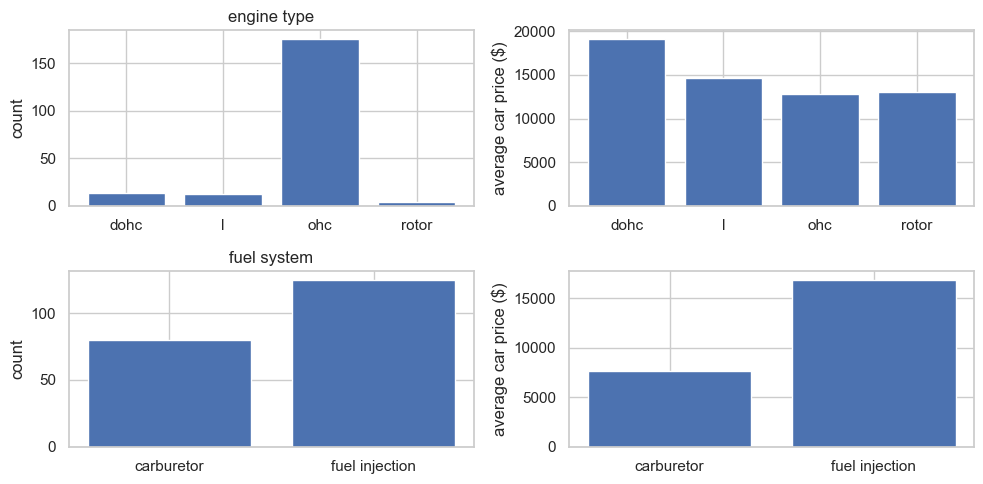

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
axes[0, 0].bar(x = enginetype['enginetype'], height=enginetype['count'])
axes[0, 0].set_ylabel("count")
axes[0, 0].set_title("engine type")
axes[0, 0].grid(True) 

axes[0, 1].bar(x = enginetype['enginetype'], height=enginetype['avg_price'])
axes[0, 1].set_ylabel("average car price ($)")
axes[0, 1].grid(True) 

axes[1, 0].bar(x = fuelsystem['fuelsystem'], height=fuelsystem['count'])
axes[1, 0].set_ylabel("count")
axes[1, 0].set_title("fuel system")
axes[1, 0].grid(True) 

axes[1, 1].bar(x = fuelsystem['fuelsystem'], height=fuelsystem['avg_price'])
axes[1, 1].set_ylabel("average car price ($)")
axes[1, 1].grid(True) 

plt.tight_layout()
plt.show()

- You probably cannot derive any significant data from the engine size because the samples for other engine sizes than ohc are too small. However the data focuses on older models and the newest models usually use dohc. Ohc seems to be a cheaper option probably because it is used in oplder models.
- Likewise it's hard to make any definitive judgement from the fuel, but here the data we're working with is much. The mfi, spfi and spdi are essentially older, less efficient fuel injection paradigms, so they can be ignoredd.
- We can however clearly see from the data that carburetor-based systems (1bbl, 2bbl and 4bbl) are significantly cheaper than mpfi, which is especially visible when you comppare the price of the most common carburetor-based system, 2bbl to mpfi.

#### Car body type

There is an assumption that the body type of a car will have a significant influence on its price:

In [11]:
carbody = df.groupby('carbody').agg(count=('carbody', 'size'), avg_price=('price', 'mean')).reset_index()
carbody

,carbody,count,avg_price
0,convertible,6,21890.500000
1,hardtop,8,22208.500000
2,hatchback,70,10376.652386
3,sedan,96,14344.270833
4,wagon,25,12371.960000


#### Car brand and price

In [12]:
brand = df.groupby('brand').agg(count=('brand', 'size'), avg_price=('price', 'mean')).reset_index()
brand


,brand,count,avg_price
0,alfa-romero,3,15498.333333
1,audi,7,17859.166714
2,bmw,8,26118.750000
3,buick,8,33647.000000
4,chevrolet,3,6007.000000
5,dodge,9,7875.444444
6,honda,13,8184.692308
7,isuzu,4,8916.500000
8,jaguar,3,34600.000000
9,mazda,17,10652.882353


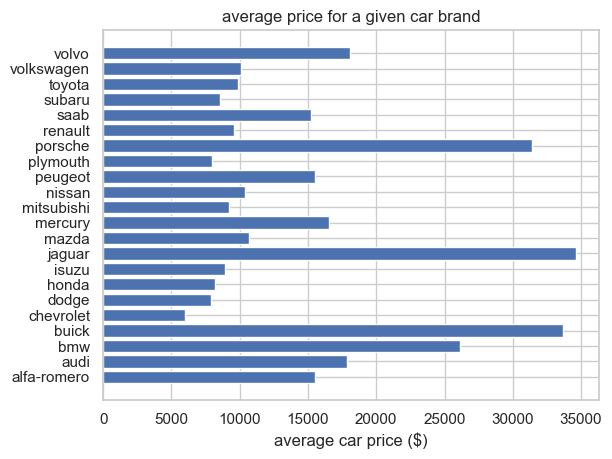

In [13]:
plt.barh(y=brand['brand'], width=brand['avg_price'])
plt.xlabel("average car price ($)")
plt.title("average price for a given car brand")
plt.grid(True) 
plt.show()

## numerical variables and price

The first obvious variable to compare to price is horsepower. I've also added a color for cylinder number to see if this number relates to the horsepower in any way. I also added fuel type to see if it correlates in any way with these two variables:

c:\Users\Vixie\Documents\vscode-projects\project-test\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


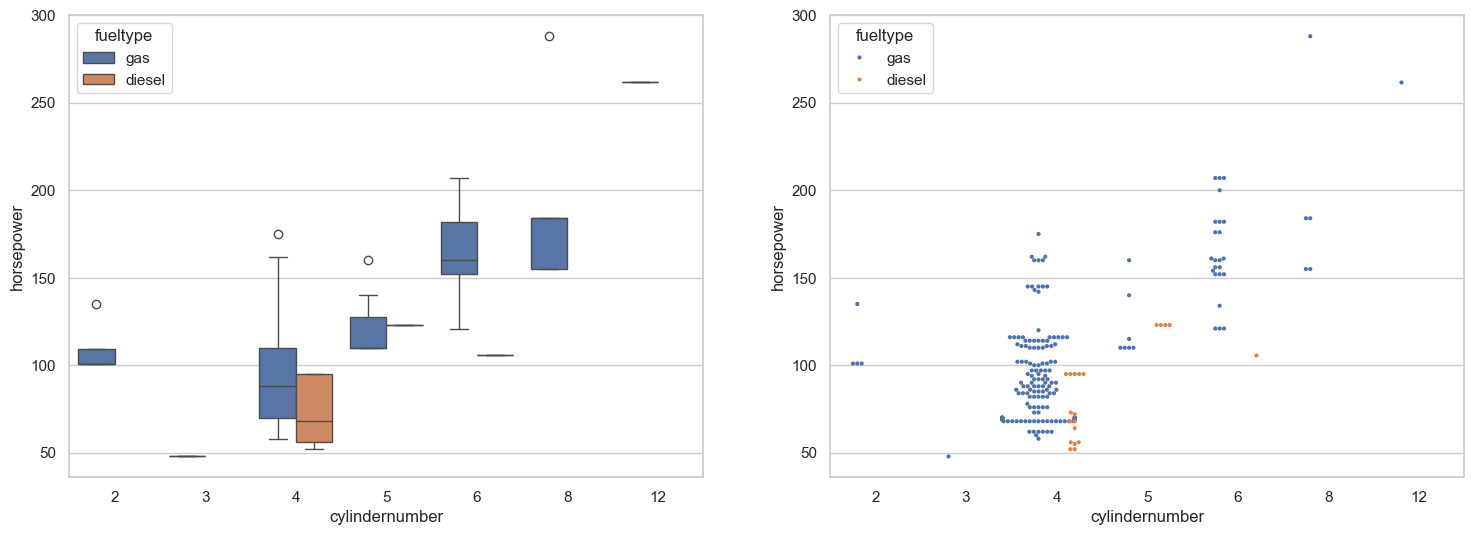

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.boxplot(data=df, x='cylindernumber', y='horsepower', hue='fueltype', ax=axes[0])
sns.swarmplot(data=df, x='cylindernumber', y='horsepower', hue='fueltype', ax=axes[1], dodge=True, size=3)
plt.show()

Although some points cannot be placed on the swarmpoint (only in areas where there are too many points in the same place), we can see that more cylinders does not always mean higher horsepower. We can also see that diesel cars cluster on the lower end in terms of horsepower and they don't have more than 6 cylinders.

Now I will try to summarize many variables that might all tie to horsepower and price to see which ones are worth inversigating further:

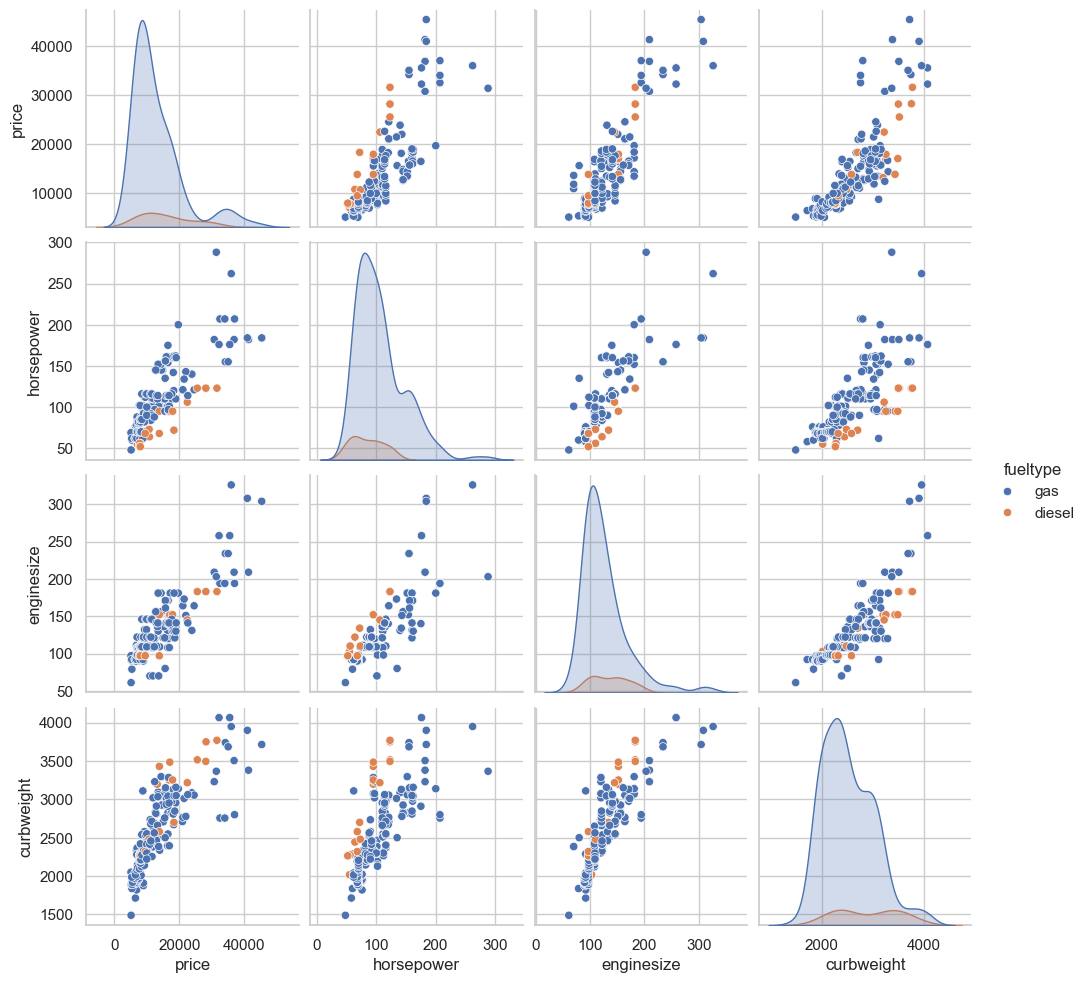

In [15]:
sns.pairplot(df, vars=['price', 'horsepower', 'enginesize', 'curbweight'], hue='fueltype')
plt.show()

In [16]:
import sys
print(sys.executable)

c:\Users\Vixie\Documents\vscode-projects\project-test\.venv\Scripts\python.exe


There is definitely a positive correlation between all these variables. Let's see the correlation between enginesize and horsepower:

In [17]:
px.scatter(df, x='enginesize', y='horsepower', color='fueltype', trendline='ols', title='Engine Size vs Horsepower by Fuel Type').show()

Next we will look like at the relationship between horsepower and curbweight:

In [18]:
px.scatter(df, x='curbweight', y='horsepower', color='fueltype', trendline='ols', title='Curb Weight vs Horsepower by Fuel Type').show()

And finally let's look at the relationship between horsepower and price:

In [19]:
px.scatter(df, x='price', y='horsepower', color='fueltype', trendline='ols', title='Price vs Horsepower by Fuel Type').show()

#### Horse power and categorical variables



#### Car dimensions and price

Since making a bigger car require more materials it is expected that larger cars will be more expensive. This can be summarized nicely in a 3D plot:

In [20]:
fig = px.scatter_3d(df, x='carlength', y='carwidth', z='carheight', color='price', title='3D Scatter Plot of Car Dimensions and Price')
fig.show()

Let's plot it in scatterplots to make the date more clear:

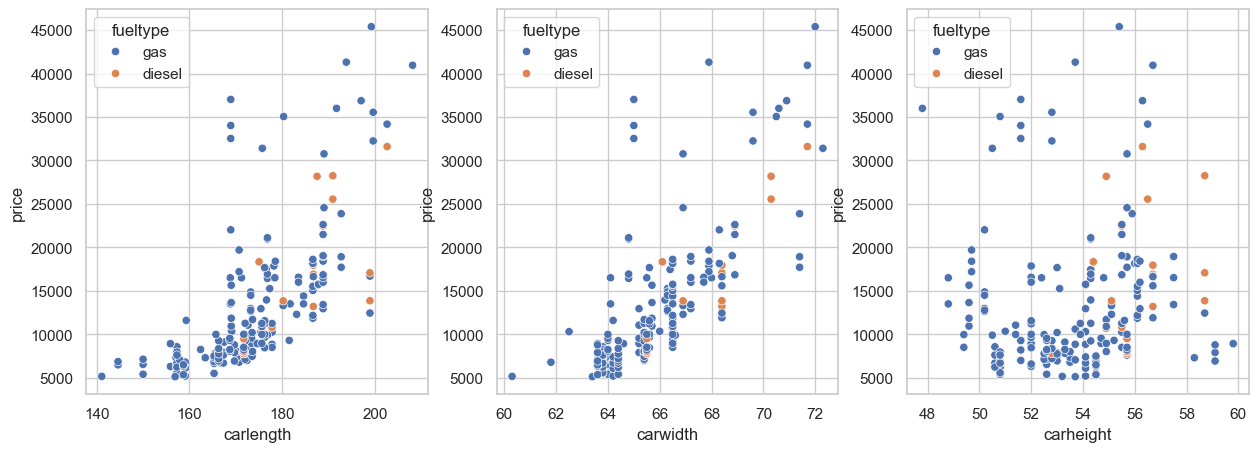

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.scatterplot(data=df, x='carlength', y='price', hue='fueltype', ax=axes[0])
sns.scatterplot(data=df, x='carwidth', y='price', hue='fueltype', ax=axes[1])
sns.scatterplot(data=df, x='carheight', y='price', hue='fueltype', ax=axes[2])
plt.show()

As you can see although there is some positive correlation between  car width and lenght, and its price, the relationship is not as clear and there are some expensive medium-sized cars.